In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings("ignore")

from ggplot import *
from scipy.stats import logistic
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import *
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor, export_graphviz
import graphviz
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.svm import SVC, SVR
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [2]:
# with replacement

data1=np.array([1,2,3,4,5])

np.random.seed(0)
np.random.choice(data1,size=2,replace=True)

array([5, 1])

In [5]:
file1="c:/temp/iris.csv"
iris=pd.read_csv(file1)
iris

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [7]:
# with replacement

np.random.seed(0)
iris_100=iris.iloc[np.random.randint(150,size=100)] # 100줄 뽑기, 150은 뭐지?
iris_100

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
47,4.6,3.2,1.4,0.2,setosa
117,7.7,3.8,6.7,2.2,virginica
67,5.8,2.7,4.1,1.0,versicolor
103,6.3,2.9,5.6,1.8,virginica
9,4.9,3.1,1.5,0.1,setosa
...,...,...,...,...,...
138,6.0,3.0,4.8,1.8,virginica
114,5.8,2.8,5.1,2.4,virginica
43,5.0,3.5,1.6,0.6,setosa
127,6.1,3.0,4.9,1.8,virginica


In [8]:
# Bagging
# bag1 , train test split , tree 10개

X=iris[['Sepal.Length','Sepal.Width','Petal.Length','Petal.Width']]
y=iris['Species']
X_train,X_test,y_train,y_test=train_test_split(X,y,train_size=0.7,random_state=0)

bag1=RandomForestClassifier(n_estimators=10,max_features=None,max_depth=2,random_state=0)
result1=bag1.fit(X_train,y_train)
pred1=result1.predict(X_test)
confusion_matrix(y_test,pred1)

array([[16,  0,  0],
       [ 0, 17,  1],
       [ 0,  3,  8]], dtype=int64)

In [9]:
# CCR 1
(16+17+8)/(16+17+8+1+3)

0.9111111111111111

In [10]:
# bag2 , bagging, tree=100, train test split
X=iris[['Sepal.Length','Sepal.Width','Petal.Length','Petal.Width']]
y=iris['Species']
X_train,X_test,y_train,y_test=train_test_split(X,y,train_size=0.7,random_state=0)

bag2=RandomForestClassifier(n_estimators=100,max_features=None,max_depth=2,random_state=0)
result2=bag2.fit(X_train,y_train)
pred2=result2.predict(X_test)
confusion_matrix(y_test,pred2)


array([[16,  0,  0],
       [ 0, 17,  1],
       [ 0,  1, 10]], dtype=int64)

In [11]:
# CCR 2
(16+17+10)/(16+17+10+1+1)

0.9555555555555556

In [12]:
# bag3, bagging, tree=500, train test split
X=iris[['Sepal.Length','Sepal.Width','Petal.Length','Petal.Width']]
y=iris['Species']
X_train,X_test,y_train,y_test=train_test_split(X,y,train_size=0.7,random_state=0)

bag3=RandomForestClassifier(n_estimators=500,max_features=None,max_depth=2,random_state=0)
result3=bag3.fit(X_train,y_train)
pred3=result3.predict(X_test)
confusion_matrix(y_test,pred3)

array([[16,  0,  0],
       [ 0, 17,  1],
       [ 0,  0, 11]], dtype=int64)

In [13]:
# CCR 3
(16+17+11)/(16+17+11+1)

0.9777777777777777

In [14]:
# random forest
# rf4, random forest, classifier, train test split, tree=10
X=iris[['Sepal.Length','Sepal.Width','Petal.Length','Petal.Width']]
y=iris['Species']
X_train,X_test,y_train,y_test=train_test_split(X,y,train_size=0.7,random_state=0)

rf4=RandomForestClassifier(n_estimators=10,max_features='auto',max_samples=0.66,max_depth=2,random_state=0)
result4=rf4.fit(X_train,y_train)
pred4=result4.predict(X_test)
confusion_matrix(y_test,pred4)

array([[16,  0,  0],
       [ 0, 17,  1],
       [ 0,  1, 10]], dtype=int64)

In [15]:
# CCR 4
(16+17+10)/(16+17+10+1+1)

0.9555555555555556

In [16]:
# 지금까진 y가 이산형 => RandomForestClassifier

# 지금부터 y가 연속형 =? RnandomForestRegressor

In [18]:
# bag5, train test split, tree=100, bagging
file5="c:/temp/Boston.csv"
data5=pd.read_csv(file5)


X=data5.drop('medv',axis=1)
y=data5['medv']
X_train,X_test,y_train,y_test=train_test_split(X,y,train_size=0.7,random_state=0)

bag5=RandomForestRegressor(n_estimators=100,max_features=None,max_depth=3,random_state=0)
result5=bag5.fit(X_train,y_train)
pred5=result5.predict(X_test)
mean_squared_error(y_test,pred5)

17.857767501639618

In [19]:
# rf6, train test split, tree=100, random forest
X=data5.drop('medv',axis=1)
y=data5['medv']
X_train,X_test,y_train,y_test=train_test_split(X,y,train_size=0.7,random_state=0)

bag6=RandomForestRegressor(n_estimators=100,max_features='auto',max_samples=0.66,max_depth=3,random_state=0)
result6=bag6.fit(X_train,y_train)
pred6=result6.predict(X_test)
mean_squared_error(y_test,pred6)

19.639974504576372

In [20]:
# 해석
# MSE가 작을 수록 좋음. 

In [21]:
# random forest에서 사용하는 x 변수 개수
np.sqrt(13)

3.605551275463989

In [22]:
data5

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0


In [25]:
# random forest에서 중요한 변수 = vip가 큰 값
imp=result6.feature_importances_
imp

array([2.13681757e-02, 4.65869412e-04, 2.89659108e-03, 8.14505090e-04,
       1.32182661e-02, 4.93489561e-01, 4.21119016e-03, 3.02357322e-02,
       2.12648443e-03, 4.74239267e-03, 9.71116968e-03, 3.51993027e-03,
       4.13200132e-01])

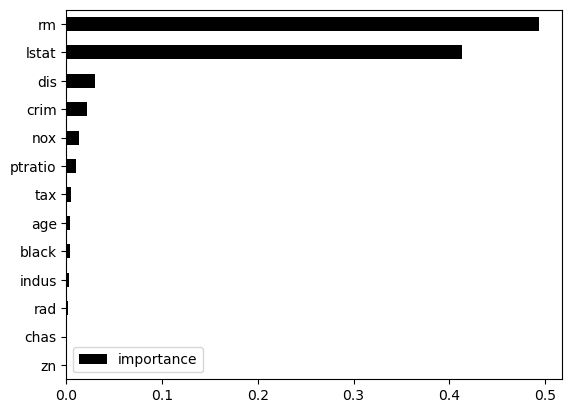

In [26]:
# vip 그리기
imp1=pd.DataFrame({'importance':imp},index=X.columns)
imp1.sort_values('importance',ascending=True,inplace=True)
imp1.plot(kind='barh',color='black')
plt.show()